In [24]:
import sys
import os
import numpy as np
from importlib import reload  # Import the reload function
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import utils.preprocess as pp
import utils.helpers as hp
reload(hp)
reload(pp)

%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = hp.load_data('../data/BTCUSDT_15m_v200k.csv')
feature_df = pp.create_indicators(df, 46)
norm_df = pp.normalize_X(feature_df, scaler_name='StandardScaler')

Dataset loaded from ../data/BTCUSDT_15m_v200k.csv.


In [5]:

# Call the function to add features to your DataFrame

norm_df.head()

,MFI,HT_DCPERIOD,NATR,ATR,HT_DCPHASE,CCI,ULTOSC,volume,ADOSC,DX,...,MACD_signal,AROON_up,STOCHF_k,APO,STOCHF_d,ROCP,BOP,minute,HT_TRENDMODE,close
0,-2.248809,2.074190,-1.197899,-1.034333,1.535717,-0.63662,-5.380092,-0.371512,-0.034673,-1.354121,...,-0.022775,1.52818,-1.75073,-0.015314,-2.168621,-0.016585,-0.009767,1.341605,1.164571,9930.13
1,-2.248809,2.074199,-1.197899,-1.034333,1.535688,-0.63662,-5.380092,-0.371512,-0.034673,-1.354121,...,-0.022775,1.52818,-1.75073,-0.015314,-2.168621,-0.016585,-0.009767,-1.341653,1.164571,9930.13
2,-2.248809,2.074206,-1.197899,-1.034333,1.535664,-0.63662,-5.380092,-0.371512,-0.034673,-1.354121,...,-0.022775,1.52818,-1.75073,-0.015314,-2.168621,-0.016585,-0.009767,-0.447234,1.164571,9930.13
3,-2.248809,2.074212,-1.197899,-1.034333,1.535645,-0.63662,-5.380092,-0.371512,-0.034673,-1.354121,...,-0.022775,1.52818,-1.75073,-0.015314,-2.168621,-0.016585,-0.009767,0.447185,1.164571,9930.13
4,-2.248809,2.074217,-1.197899,-1.034333,1.535629,-0.63662,-5.380092,-0.371512,-0.034673,-1.354121,...,-0.022775,1.52818,-1.75073,-0.015314,-2.168621,-0.016585,-0.009767,1.341605,1.164571,9930.13


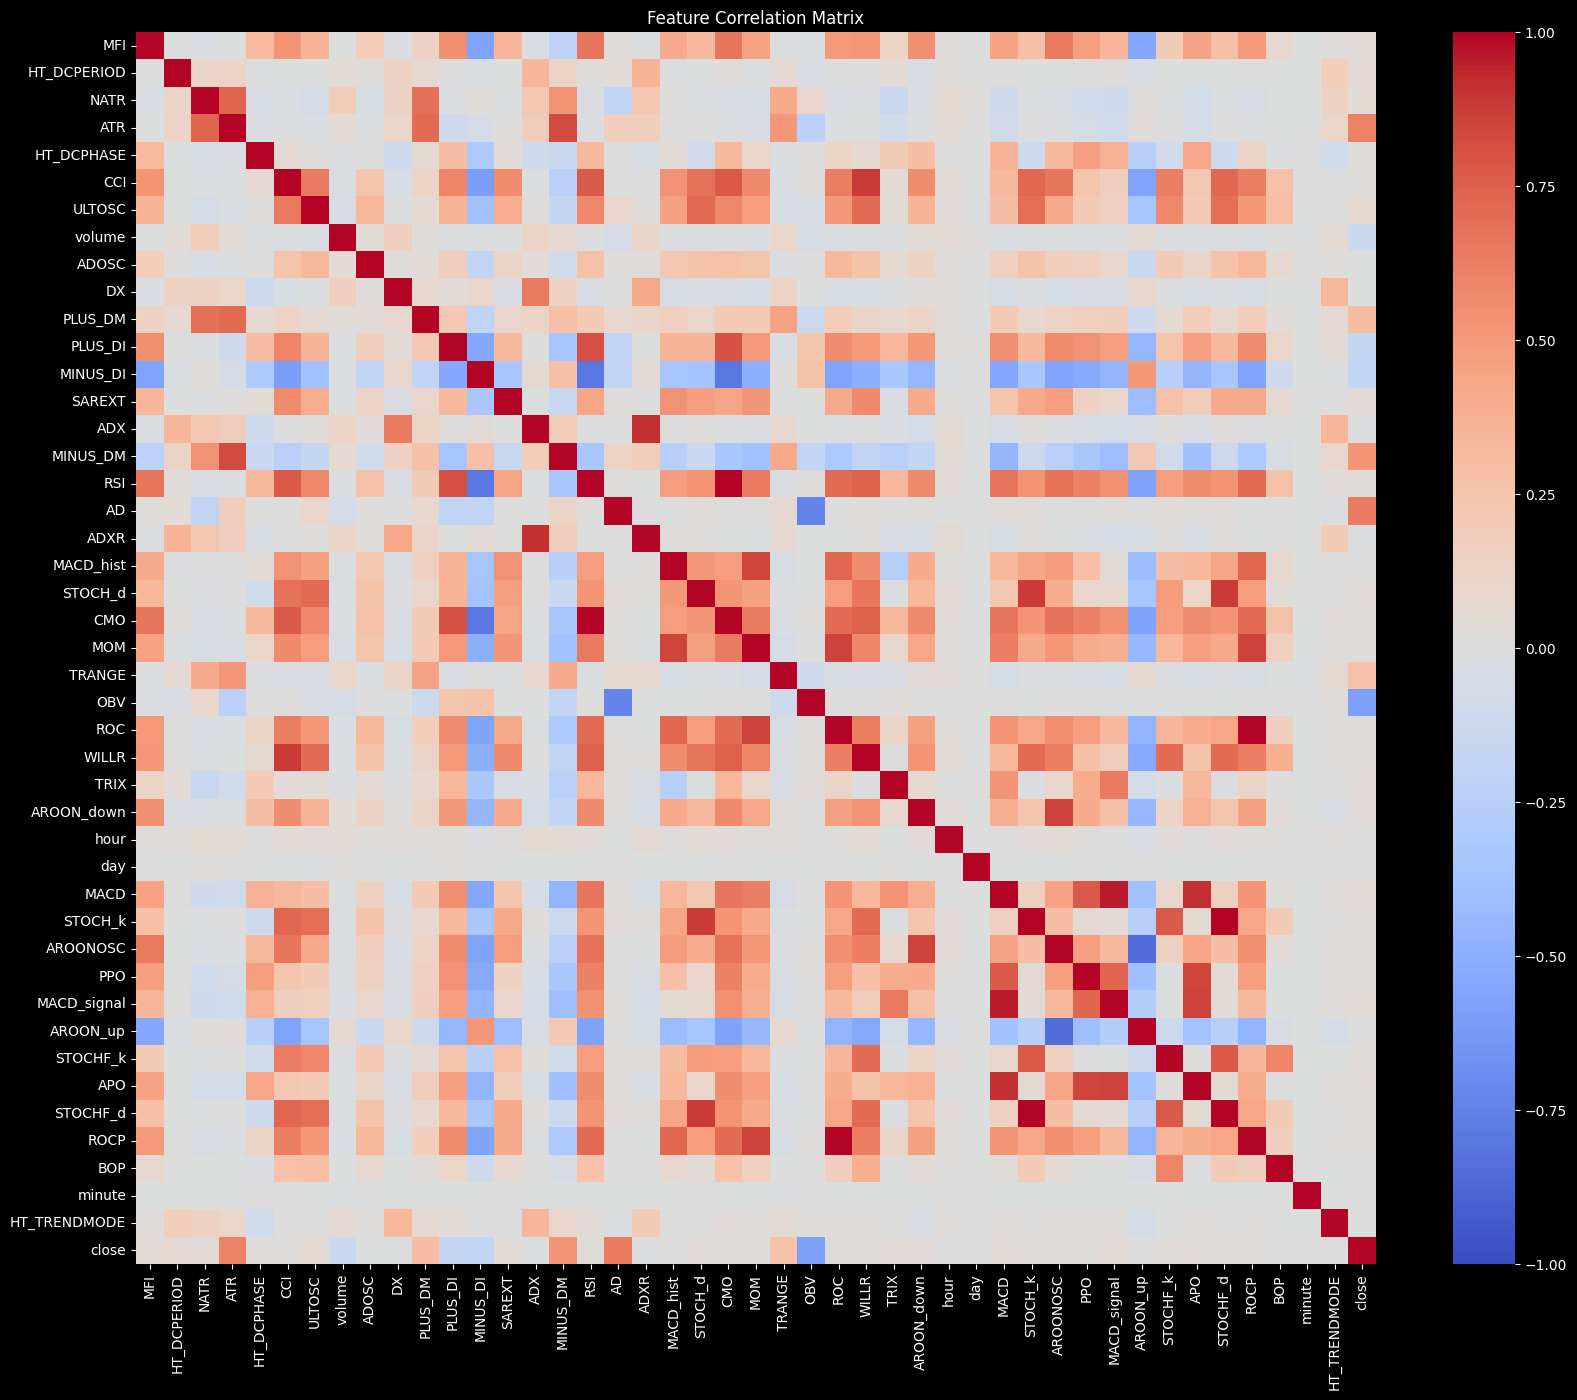

In [6]:
import seaborn as sns
#import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = feature_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Feature Correlation Matrix')
plt.show()

In [25]:
X, y = pp.create_classification_targets(norm_df)

In [26]:
X[:50]

array([[[-1.63121470e+00,  4.48001349e-01,  3.11729700e-01, ...,
          1.34160493e+00,  1.16457099e+00,  8.40543000e+03],
        [-1.35484804e+00,  7.36351383e-01,  3.17242933e-01, ...,
         -1.34165339e+00,  1.16457099e+00,  8.39653000e+03],
        [-1.04360080e+00,  9.50927593e-01,  2.57478170e-01, ...,
         -4.47233947e-01,  1.16457099e+00,  8.37870000e+03],
        ...,
        [ 2.43956141e-01, -9.68828232e-01, -5.38896845e-01, ...,
         -1.34165339e+00, -8.58685310e-01,  8.42860000e+03],
        [ 3.26768948e-01, -1.05314720e+00, -5.74761579e-01, ...,
         -4.47233947e-01, -8.58685310e-01,  8.43062000e+03],
        [ 3.58898915e-01, -1.13938329e+00, -5.93577874e-01, ...,
          4.47185491e-01, -8.58685310e-01,  8.42537000e+03]],

       [[-1.35484804e+00,  7.36351383e-01,  3.17242933e-01, ...,
         -1.34165339e+00,  1.16457099e+00,  8.39653000e+03],
        [-1.04360080e+00,  9.50927593e-01,  2.57478170e-01, ...,
         -4.47233947e-01,  1.16457099e

In [17]:
# Window size is the number of candles to base predctions on
# Look ahead is the number of candles in which to find the max and min price in
X, y = pp.create_targets(norm_df, 1, 20, 5)


In [6]:
print(X.shape)
X_flat = X.reshape(X.shape[0], -1)

print(X.shape)


(36913, 1, 44)
(36913, 1, 44)


In [7]:
y_max = y[:, 0]  # Grabs all rows of the first column
print(y_max.shape)

(36913,)


In [8]:
from sklearn.model_selection import train_test_split

X_big, X_small, y_big, y_small = train_test_split(X_flat, y_max, test_size=.9, random_state=42)



In [9]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

print("Initializing Random Forest Regressor with verbose output...")
rf = RandomForestRegressor(n_estimators=20, random_state=42, verbose=2)  # Verbose output
print("Fitting the model...")
rf.fit(X_small, y_small)  # Progress will be printed to the console

print("Training complete. Extracting feature importances...")


Initializing Random Forest Regressor with verbose output...
Fitting the model...
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Training complete. Extracting feature importances...


In [10]:
import pandas as pd
import numpy as np

# Assume column names are in a list (use indices if no names are available)
column_names = [f"Feature_{i}" for i in range(X_small.shape[1])]

# Convert NumPy array to DataFrame
X_small_df = pd.DataFrame(X_small, columns=column_names)

# Create feature importance Series
feature_importances = pd.Series(rf.feature_importances_, index=X_small_df.columns).sort_values(ascending=False)


In [11]:
feature_importances

Feature_2     0.156651
Feature_27    0.048141
Feature_17    0.040316
Feature_1     0.032909
Feature_24    0.032677
Feature_18    0.032177
Feature_3     0.026966
Feature_8     0.026628
Feature_14    0.025246
Feature_0     0.024596
Feature_15    0.024012
Feature_7     0.023837
Feature_6     0.023426
Feature_30    0.023419
Feature_34    0.023175
Feature_4     0.023142
Feature_29    0.023020
Feature_23    0.021943
Feature_41    0.021613
Feature_13    0.021593
Feature_40    0.021421
Feature_26    0.019564
Feature_9     0.019230
Feature_12    0.018975
Feature_5     0.018701
Feature_11    0.017975
Feature_10    0.017866
Feature_20    0.017583
Feature_37    0.016592
Feature_35    0.015883
Feature_31    0.014165
Feature_19    0.013962
Feature_25    0.013347
Feature_38    0.013339
Feature_22    0.012969
Feature_32    0.011537
Feature_33    0.011295
Feature_16    0.010099
Feature_39    0.009881
Feature_21    0.008663
Feature_36    0.007899
Feature_28    0.006588
Feature_42    0.004765
Feature_43 

In [12]:

# Simulated feature importances from the model (replace this with `rf.feature_importances_`)
feature_importances = rf.feature_importances_

# Number of indicators and candles
num_indicators = 46
num_candles = 1

# Reshape feature importances into [candles, indicators]
reshaped_importances = feature_importances.reshape(num_candles, num_indicators)

# Aggregate importance for each indicator across all candles
indicator_importances = reshaped_importances.sum(axis=0)

# Create a DataFrame for better visualization
indicator_df = pd.DataFrame({
    'Indicator': [f'Indicator_{i+1}' for i in range(num_indicators)],
    'Importance': indicator_importances
}).sort_values(by='Importance', ascending=False)

ValueError: cannot reshape array of size 44 into shape (1,46)

46
Indicator: NATR, Importance: 0.1684
Indicator: OBV, Importance: 0.0377
Indicator: AD, Importance: 0.0369
Indicator: TRIX, Importance: 0.0345
Indicator: HT_DCPERIOD, Importance: 0.0339
Indicator: ADXR, Importance: 0.0299
Indicator: ATR, Importance: 0.0270
Indicator: ADOSC, Importance: 0.0269
Indicator: volume, Importance: 0.0256
Indicator: MFI, Importance: 0.0249
Indicator: PLUS_DI, Importance: 0.0243
Indicator: MINUS_DI, Importance: 0.0240
Indicator: ADX, Importance: 0.0238
Indicator: HT_DCPHASE, Importance: 0.0229
Indicator: day, Importance: 0.0225
Indicator: MINUS_DM, Importance: 0.0221
Indicator: hour, Importance: 0.0220
Indicator: CCI, Importance: 0.0215
Indicator: SAREXT, Importance: 0.0214
Indicator: TRANGE, Importance: 0.0213
Indicator: PLUS_DM, Importance: 0.0212
Indicator: ULTOSC, Importance: 0.0209
Indicator: STOCH_d, Importance: 0.0199
Indicator: DX, Importance: 0.0192
Indicator: WILLR, Importance: 0.0174


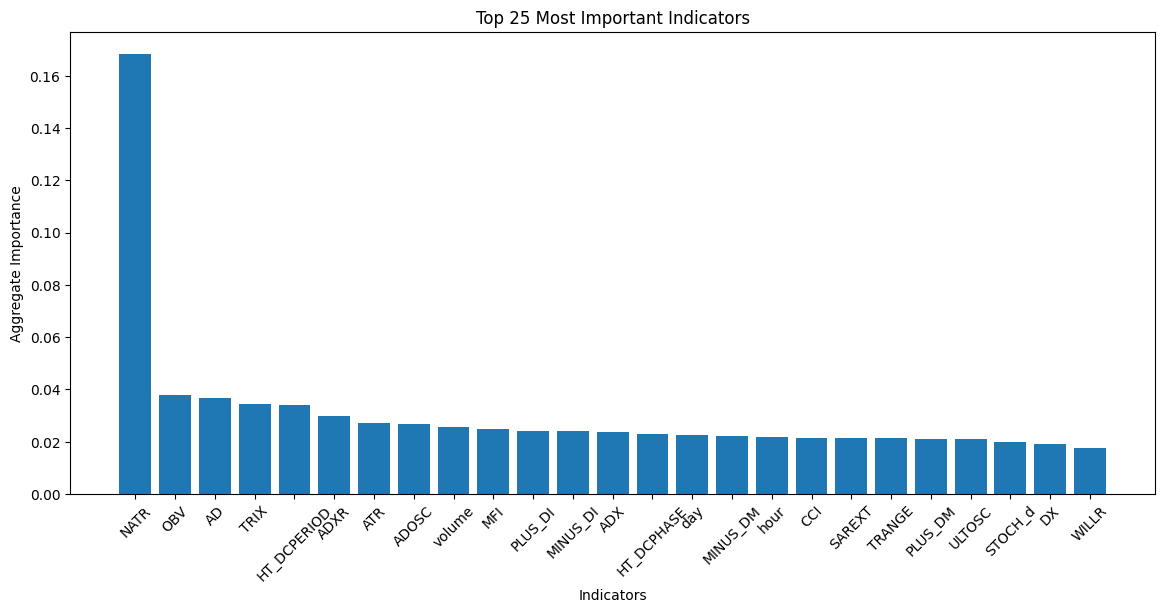

In [ ]:
# List of indicator names (from your provided names)
indicator_names = ['MFI', 'HT_DCPERIOD', 'NATR', 'ATR', 'HT_DCPHASE', 'CCI', 'ULTOSC', 'volume', 'ADOSC', 'DX', 'PLUS_DM', 'PLUS_DI', 'MINUS_DI', 'SAREXT', 'ADX', 'MINUS_DM', 'RSI', 'AD', 'ADXR', 'MACD_hist', 'STOCH_d', 'CMO', 'MOM', 'TRANGE', 'OBV', 'ROC', 'WILLR', 'TRIX', 'AROON_down', 'hour', 'day', 'MACD', 'STOCH_k', 'AROONOSC', 'PPO', 'MACD_signal', 'AROON_up', 'STOCHF_k', 'ROCR', 'APO', 'STOCHF_d', 'ROCR100', 'ROCP', 'BOP', 'minute', 'HT_TRENDMODE']


print(len(indicator_names))
# Make sure the length of indicator_names matches the number of indicators
assert len(indicator_names) == len(indicator_importances), "Mismatch in number of indicators!"

# Pair indicators with their aggregated importance
indicator_importance_mapping = list(zip(indicator_names, indicator_importances))

# Sort by importance (descending)
sorted_indicators = sorted(indicator_importance_mapping, key=lambda x: x[1], reverse=True)

# Display the top N indicators
top_n = 25
for name, importance in sorted_indicators[:top_n]:
    print(f"Indicator: {name}, Importance: {importance:.4f}")

# Plot the top N indicators
top_n_indicators = sorted_indicators[:top_n]
labels, values = zip(*top_n_indicators)

plt.figure(figsize=(14, 6))
plt.bar(labels, values)
plt.title(f'Top {top_n} Most Important Indicators')
plt.xlabel('Indicators')
plt.ylabel('Aggregate Importance')
plt.xticks(rotation=45)
plt.show()



In [ ]:
sorted_indicators

NameError: name 'sorted_indicators' is not defined

    Row Number  Importance
77          78    0.044361
83          84    0.043283
98          99    0.034627
93          94    0.034483
72          73    0.031881
..         ...         ...
24          25    0.004375
12          13    0.004312
34          35    0.003984
47          48    0.003929
10          11    0.003468

[100 rows x 2 columns]


<Figure size 1200x600 with 0 Axes>

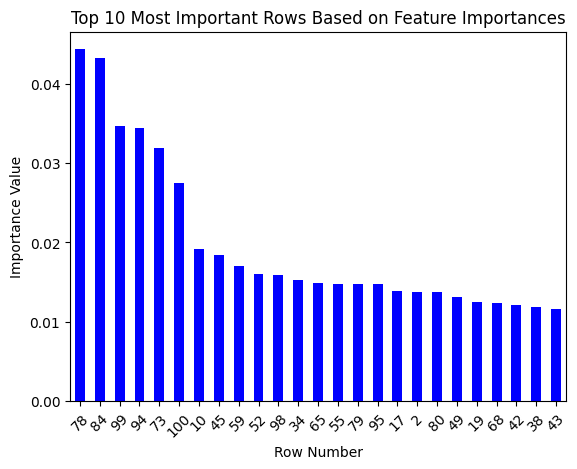

In [ ]:

# Simulated feature importances from the model (replace this with `rf.feature_importances_`)
feature_importances = rf.feature_importances_

# Number of indicators and candles
num_indicators = 46
num_candles = 100

# Reshape feature importances into [candles, indicators]
reshaped_importances = feature_importances.reshape(num_candles, num_indicators)

# Aggregate importance for each row (candle) across all indicators
row_importances = reshaped_importances.sum(axis=1)

# Create a DataFrame for better visualization
row_importance_df = pd.DataFrame({
    'Row Number': range(1, num_candles + 1),  # Row numbers from 1 to 100
    'Importance': row_importances
}).sort_values(by='Importance', ascending=False)

# Display the top rows for verification
print(row_importance_df.head(100))

import matplotlib.pyplot as plt

# Plot the top 10 most important rows
plt.figure(figsize=(12, 6))
row_importance_df.head(25).plot(kind='bar', x='Row Number', y='Importance', legend=False, color='blue')
plt.title('Top 10 Most Important Rows Based on Feature Importances')
plt.xlabel('Row Number')
plt.ylabel('Importance Value')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Sample importances from two targets
target1_importances = max_price_correlation

target2_importances = min_price_correlation

# Combine importances
combined_importances = {}
for feature in set(target1_importances) | set(target2_importances):
    importance1 = target1_importances.get(feature, 0)
    importance2 = target2_importances.get(feature, 0)
    combined_importances[feature] = (importance1 + importance2) / 2  # Average

# Sort by overall importance
sorted_combined_importances = sorted(combined_importances.items(), key=lambda x: x[1], reverse=True)

# Print the sorted importances
for feature, importance in sorted_combined_importances:
    print(f"{feature}: {importance:.4f}")


MFI: 0.0846
HT_DCPERIOD: 0.0738
NATR: 0.0611
ATR: 0.0578
HT_DCPHASE: 0.0466
CCI: 0.0338
ULTOSC: 0.0312
volume: 0.0307
ADOSC: 0.0303
DX: 0.0291
PLUS_DM: 0.0277
PLUS_DI: 0.0258
MINUS_DI: 0.0255
SAREXT: 0.0238
ADX: 0.0231
MINUS_DM: 0.0231
RSI: 0.0229
AD: 0.0224
ADXR: 0.0194
MACD_hist: 0.0164
STOCH_d: 0.0158
CMO: 0.0158
MOM: 0.0152
TRANGE: 0.0148
OBV: 0.0136
ROC: 0.0112
WILLR: 0.0109
TRIX: 0.0109
AROON_down: 0.0109
hour: 0.0106
day: 0.0103
MACD: 0.0102
STOCH_k: 0.0101
AROONOSC: 0.0096
PPO: 0.0085
MACD_signal: 0.0080
AROON_up: 0.0077
STOCHF_k: 0.0075
ROCR: 0.0074
APO: 0.0073
STOCHF_d: 0.0067
ROCR100: 0.0066
KAMA: 0.0059
ROCP: 0.0055
BOP: 0.0053
BBANDS_upper: 0.0043
minute: 0.0040
HT_TRENDLINE: 0.0033
MIDPOINT: 0.0030
MAMA_2: 0.0025
low: 0.0025
TEMA: 0.0021
SAR: 0.0020
BBANDS_lower: 0.0019
high: 0.0019
WCLPRICE: 0.0017
HT_TRENDMODE: 0.0016
MIDPRICE: 0.0013
DEMA: 0.0013
WMA: 0.0012
EMA: 0.0011
TRIMA: 0.0010
T3: 0.0010
AVGPRICE: 0.0009
open: 0.0009
SMA: 0.0009
TYPPRICE: 0.0009
BBANDS_middle: 0

In [ ]:
importance_list = [
    ('MFI', 0.0846),
    ('HT_DCPERIOD', 0.0738),
    ('NATR', 0.0611),
    ('ATR', 0.0578),
    ('HT_DCPHASE', 0.0466),
    ('CCI', 0.0338),
    ('ULTOSC', 0.0312),
    ('volume', 0.0307),
    ('ADOSC', 0.0303),
    ('DX', 0.0291),
    ('PLUS_DM', 0.0277),
    ('PLUS_DI', 0.0258),
    ('MINUS_DI', 0.0255),
    ('SAREXT', 0.0238),
    ('ADX', 0.0231),
    ('MINUS_DM', 0.0231),
    ('RSI', 0.0229),
    ('AD', 0.0224),
    ('ADXR', 0.0194),
    ('MACD_hist', 0.0164),
    ('STOCH_d', 0.0158),
    ('CMO', 0.0158),
    ('MOM', 0.0152),
    ('TRANGE', 0.0148),
    ('OBV', 0.0136),
    ('ROC', 0.0112),
    ('WILLR', 0.0109),
    ('TRIX', 0.0109),
    ('AROON_down', 0.0109),
    ('hour', 0.0106),
    ('day', 0.0103),
    ('MACD', 0.0102),
    ('STOCH_k', 0.0101),
    ('AROONOSC', 0.0096),
    ('PPO', 0.0085),
    ('MACD_signal', 0.0080),
    ('AROON_up', 0.0077),
    ('STOCHF_k', 0.0075),
    ('ROCR', 0.0074),
    ('APO', 0.0073),
    ('STOCHF_d', 0.0067),
    ('ROCR100', 0.0066),
    ('ROCP', 0.0055),
    ('BOP', 0.0053),
    ('minute', 0.0040),
    ('HT_TRENDMODE', 0.0016)
]


In [ ]:
new_list = [a for a, b in importance_list]


In [ ]:
new_list

['MFI',
 'HT_DCPERIOD',
 'NATR',
 'ATR',
 'HT_DCPHASE',
 'CCI',
 'ULTOSC',
 'volume',
 'ADOSC',
 'DX',
 'PLUS_DM',
 'PLUS_DI',
 'MINUS_DI',
 'SAREXT',
 'ADX',
 'MINUS_DM',
 'RSI',
 'AD',
 'ADXR',
 'MACD_hist',
 'STOCH_d',
 'CMO',
 'MOM',
 'TRANGE',
 'OBV',
 'ROC',
 'WILLR',
 'TRIX',
 'AROON_down',
 'hour',
 'day',
 'MACD',
 'STOCH_k',
 'AROONOSC',
 'PPO',
 'MACD_signal',
 'AROON_up',
 'STOCHF_k',
 'ROCR',
 'APO',
 'STOCHF_d',
 'ROCR100',
 'ROCP',
 'BOP',
 'minute',
 'HT_TRENDMODE']

In [ ]:
import numpy as np


# Rank the importance scores
sorted_feature_names = [feature for feature, _ in sorted(importance_list, key=lambda x: x[1], reverse=True)]

# Set your threshold for dropping rows (e.g., keep top 20% by importance rank)
num_top_indices = 20

# Select the top-ranked rows
top_ranked_indices = sorted_feature_names[:num_top_indices]

# Filter the tensor based on the top-ranked indices
filtered_df = feature_df[top_ranked_indices]
filtered_df['close'] = feature_df['close']  # Add the target column back if needed

# filtered_tensor now contains only the rows with the top importance scores
print(filtered_df.shape)  # Should be (num_top_indices, 100, 46)
filtered_df.head()


(50839, 21)


/tmp/ipykernel_21423/3714368766.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['close'] = feature_df['close']  # Add the target column back if needed


,MFI,HT_DCPERIOD,NATR,ATR,HT_DCPHASE,CCI,ULTOSC,volume,ADOSC,DX,...,PLUS_DI,MINUS_DI,SAREXT,ADX,MINUS_DM,RSI,AD,ADXR,MACD_hist,close
88,-7.487896e-14,22.412808,0.093927,0.000065,261.572026,-201.736111,32.619048,19741.0,-55969.073179,37.047015,...,20.591371,44.826880,-0.069473,16.097381,0.000407,31.809420,-860374.133333,14.448769,-0.000019,0.0691
89,-8.453968e-14,21.928195,0.087218,0.000060,281.971410,-150.144928,31.746032,29731.0,-50273.284584,37.047015,...,20.591371,44.826880,-0.069458,17.593783,0.000378,31.809420,-860374.133333,14.780443,-0.000021,0.0691
90,3.636199e+01,21.710997,0.091193,0.000063,302.571141,-53.216374,46.349206,88831.0,-43372.890651,14.658735,...,29.585784,39.749453,-0.069443,17.384137,0.000351,42.723206,-860374.133333,14.288845,-0.000015,0.0692
91,3.636199e+01,22.238122,0.084679,0.000059,309.439081,-42.813456,46.722689,69462.0,-36607.012164,14.658735,...,29.585784,39.749453,-0.069430,17.189465,0.000326,42.723206,-860374.133333,13.832360,-0.000009,0.0692
92,3.646045e+01,23.360472,0.088825,0.000062,-43.462843,58.333333,50.000000,378.0,-30511.242587,3.604484,...,37.761631,35.134115,-0.069416,16.219110,0.000303,51.690353,-860374.133333,13.372770,0.000001,0.0693


In [ ]:
filteredDoge = CryptoDataset('DOGE/USD', '5m', '2023-01-01 00:00:00', '2023-10-01 00:00:00')
filteredDoge.data = filtered_df
filteredDoge.save('data/filtered_doge_5m_v1.csv')


Dataset saved to data/filtered_doge_5m_v1.csv.
